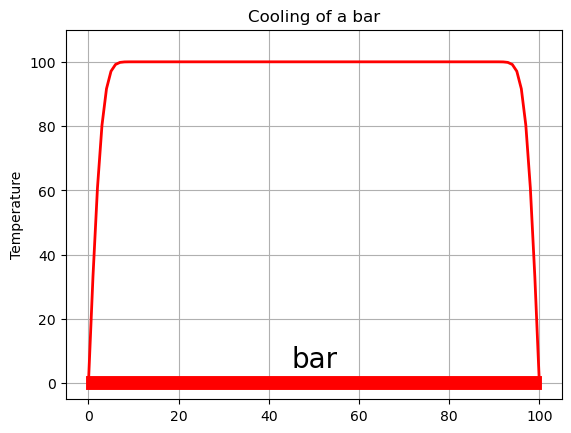

In [2]:
import matplotlib.animation as animation
from numpy import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Nx = 101
Dx = 0.01414
Dt = 0.6

KAPPA = 210.    # Thermal conductivity
SPH = 900.      # Specific heat
RHO = 2700.     # Density

cons = KAPPA / (SPH*RHO) * Dt / (Dx*Dx)
T = np.zeros((Nx, 2), float)        # Temp @ first 2 times


def init():
    for ix in range(1, Nx - 1):     # Initial temperature
        T[ix, 0] = 100.0
    T[0, 0] = 0.0                   # Bar ends T = 0
    T[0, 1] = 0.
    T[Nx - 1, 0] = 0.
    T[Nx - 1, 1] = 0.0


k = range(0, Nx)
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-5, 105), ylim=(-5, 110.0))
ax.grid()  # Plot grid

plt.ylabel("Temperature")
plt.title("Cooling of a bar")

line, = ax.plot(k, T[k, 0], "r", lw=2)
plt.plot([1, 99], [0, 0], "r", lw=10)
plt.text(45, 5, 'bar', fontsize=20)


def animate(dum):
    for ix in range(1, Nx - 1):
        T[ix, 1] = T[ix, 0] + cons * \
            (T[ix + 1, 0] + T[ix - 1, 0] - 2.0 * T[ix, 0])
    line.set_data(k, T[k, 1])

    for ix in range(1, Nx - 1):
        T[ix, 0] = T[ix, 1]  # Row of 100 positions at 't = m'

    return line,


ani = animation.FuncAnimation(
    fig=fig, func=animate, frames=np.linspace(0, 1, 10), init_func=init)

ani.save('heatAnimation.gif', writer='pillow', fps=10)
